# **Predicting Blood Donor Availability (dataset is from kaggle)**

In [52]:
pip install scikeras

In [53]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Libraries for Deep Learning Models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Instead of importing from tensorflow.keras.wrappers.scikit_learn, use:
from scikeras.wrappers import KerasClassifier  # This imports KerasClassifier fromscikeras
from tensorflow.keras.optimizers import SGD

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [56]:
df=pd.read_csv('blood_donor_dataset.csv')

df.head()

,donor_id,name,email,password,contact_number,city,blood_group,availability,months_since_first_donation,number_of_donation,pints_donated,created_at
0,1b8b4c828a,Norma Fisher,ysullivan@yahoo.com,P5hX6Syg*A,+61 461706749,Hobart,A+,No,65,31,62,2017-03-17
1,a6a3f7fe55,Eugene Bowman,hramos@brown-sellers.com,b6Wq6Cqz@5,+61 450709944,Darwin,AB-,Yes,64,8,16,2016-11-11
2,cee6478144,Sheri Bolton DDS,jasmine85@hotmail.com,$9RB51m#s7,+61 428756361,Melbourne,AB+,Yes,39,6,6,2022-02-25
3,5986bc55f9,Kelly Boyd,pattylawrence@riley-hayes.com,@5Tdg(4kCm,+61 454318320,Darwin,A-,No,55,20,20,2025-04-04
4,93246afe6c,Taylor Guzman,martinezjacob@wilson.com,x!)9Ag@J*7,+61 484158472,Darwin,O-,No,7,35,35,2022-11-30


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   donor_id                     10000 non-null  object
 1   name                         10000 non-null  object
 2   email                        10000 non-null  object
 3   password                     10000 non-null  object
 4   contact_number               10000 non-null  object
 5   city                         10000 non-null  object
 6   blood_group                  10000 non-null  object
 7   availability                 10000 non-null  object
 8   months_since_first_donation  10000 non-null  int64 
 9   number_of_donation           10000 non-null  int64 
 10  pints_donated                10000 non-null  int64 
 11  created_at                   10000 non-null  object
dtypes: int64(3), object(9)
memory usage: 937.6+ KB


In [58]:
df_new = df[["blood_group", "availability", "months_since_first_donation","number_of_donation","pints_donated"]]
df_new.head()

,blood_group,availability,months_since_first_donation,number_of_donation,pints_donated
0,A+,No,65,31,62
1,AB-,Yes,64,8,16
2,AB+,Yes,39,6,6
3,A-,No,55,20,20
4,O-,No,7,35,35


In [59]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [60]:
le = LabelEncoder()
df_new["availability"] = le.fit_transform(df["availability"])
bg_encoder = LabelEncoder()
df_new["blood_group"] = bg_encoder.fit_transform(df["blood_group"])




<Axes: title={'center': 'Correlation Matrix'}>

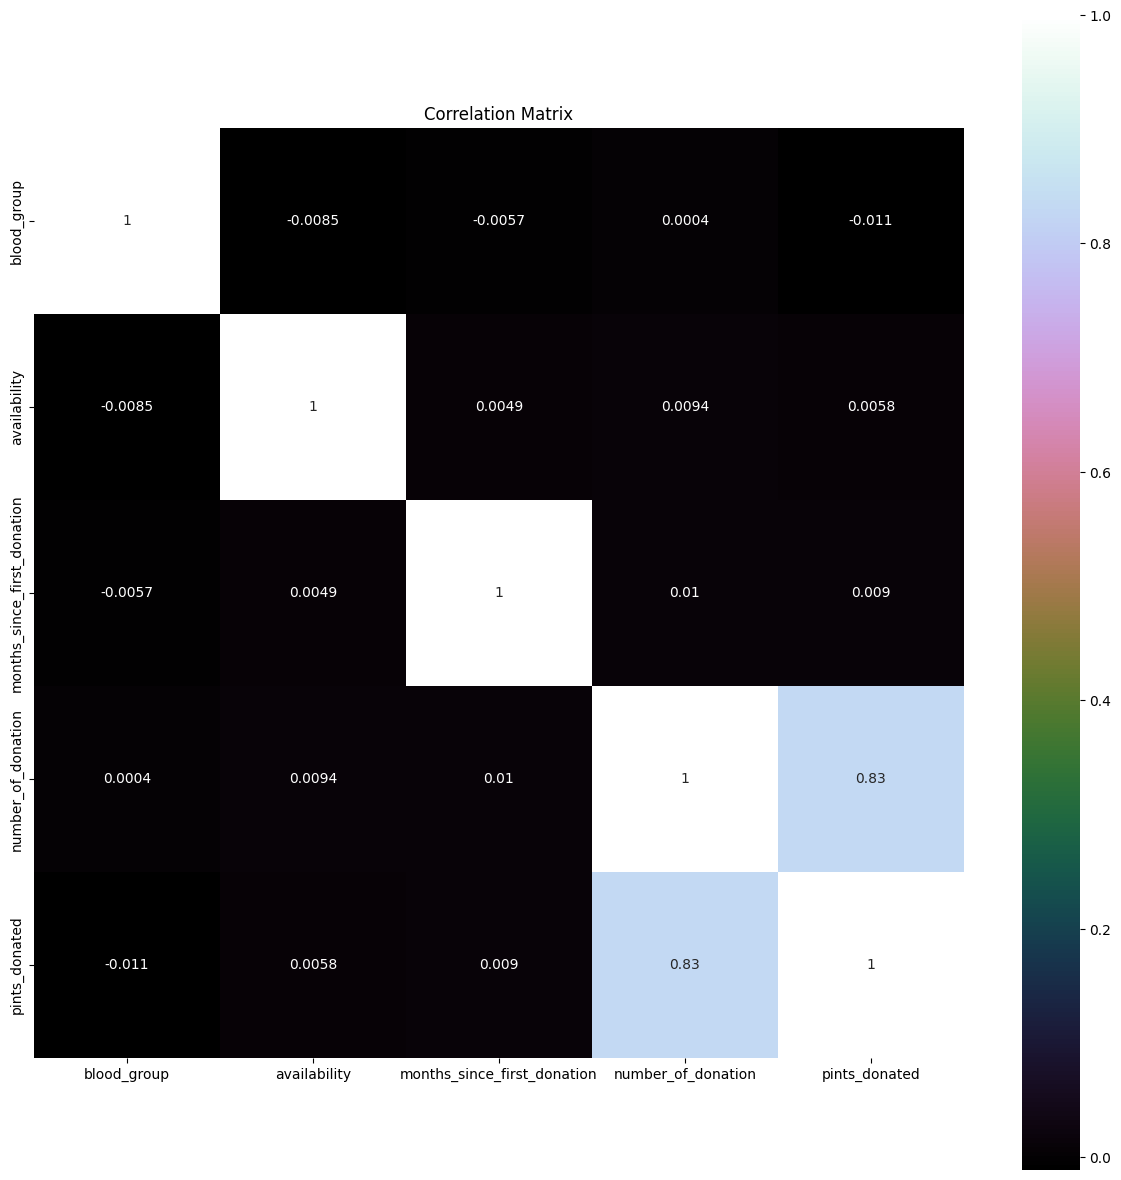

In [61]:
correlation = df_new.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [62]:
features=["blood_group", "months_since_first_donation","number_of_donation","pints_donated"]
X = df_new[features]
Y = df_new["availability"]

In [63]:
# Ensure all feature names are strings
X.columns = X.columns.astype(str)

# Now you can proceed with the feature selection
bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X,Y)

# Extract the scores and feature names
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenate the feature names and their scores
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # Naming the dataframe columns

# Print the top 10 features
featureScores.nlargest(10, 'Score').set_index('Specs')

,Score
Specs,
number_of_donation,0.889902
blood_group,0.729894
pints_donated,0.338347
months_since_first_donation,0.237440


In [64]:
validation_size = 0.2

#In case the data is not dependent on the time series, then train and test split randomly
# seed = 7
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

#In case the data is dependent on the time series, then train and test split should be done based on sequential sample
#This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets.
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [65]:
# test options for classification
num_folds = 10
seed = 7
scoring = 'accuracy'
scoring = 'precision'
scoring = 'recall'
scoring ='neg_log_loss'
scoring = 'roc_auc'

In [66]:
models = []
models.append(('LR', LogisticRegression(n_jobs=-1)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#Neural Network
models.append(('NN', MLPClassifier()))
#Ensable Models
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier(n_jobs=-1)))

In [67]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.491693 (0.015089)
LDA: 0.491667 (0.015093)
KNN: 0.499200 (0.016289)
CART: 0.500483 (0.020380)
NB: 0.485458 (0.014499)
NN: 0.493816 (0.018096)
AB: 0.493361 (0.012288)
GBM: 0.498389 (0.014155)
RF: 0.493129 (0.015291)


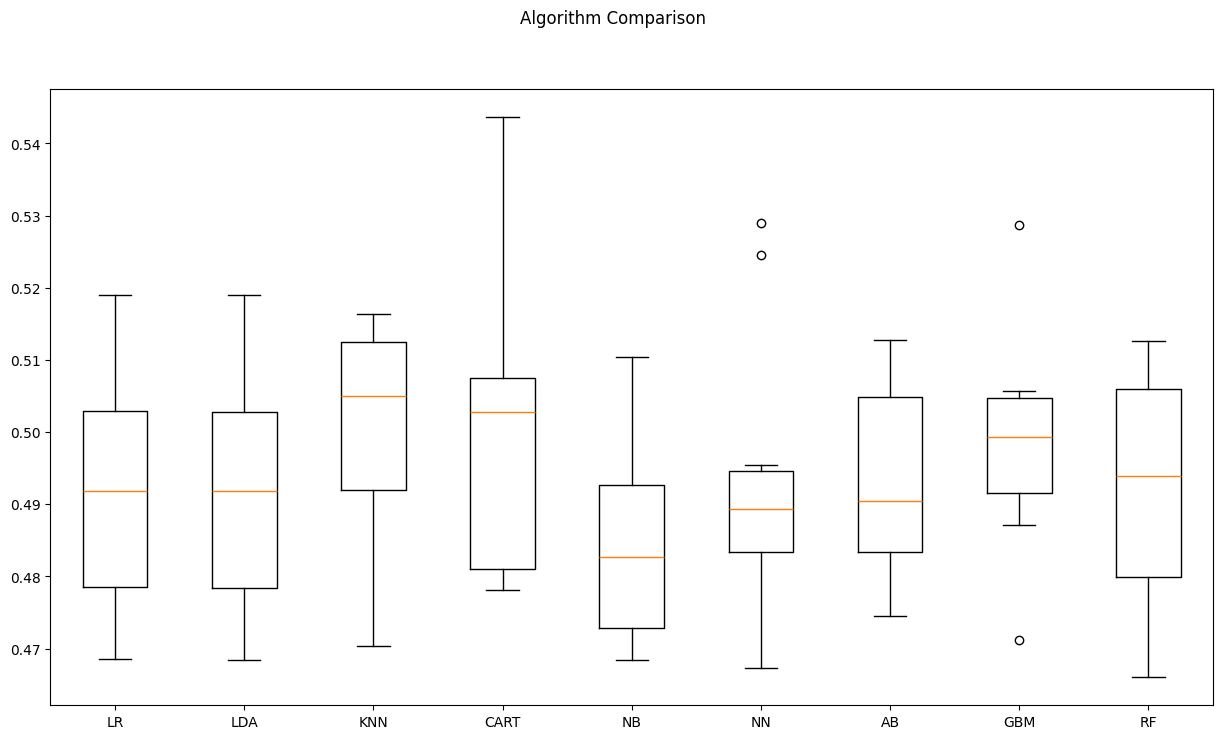

In [68]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

In [69]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000, random_state=10, n_jobs=-1, min_samples_leaf = 5)#隨機森林參數設定
# Create the model on train dataset
model = clf.fit(X_train, Y_train)#開始訓練
Y_pre = clf.predict(X_test)#預測結果

from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_pre)#訓練後報告
Y_pred = clf.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.468

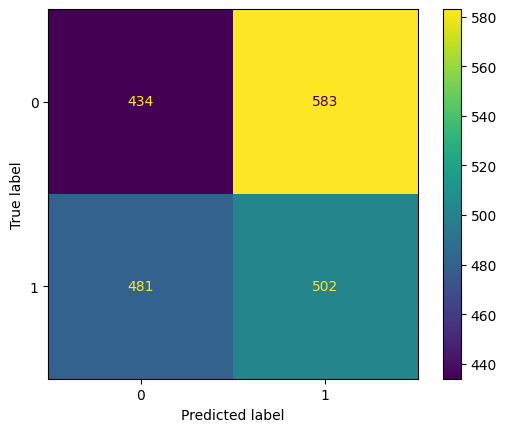

In [71]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [72]:
from sklearn.metrics import recall_score

recall_score(Y_test, Y_pred)
from sklearn.metrics import precision_score

precision_score(Y_test, Y_pred)

0.4626728110599078

In [74]:
from sklearn.model_selection import GridSearchCV

rf_grid = RandomForestClassifier()
gr_space = {
    'max_depth': [3,5,7,10],
    'n_estimators': [100, 200],
    'max_features': [2, 3 ,4],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(rf_grid, gr_space, cv = 3, scoring='accuracy', verbose = 3)
model_grid = grid.fit(X_train, Y_train)

print('Best hyperparameters are '+str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3] END max_depth=3, max_features=2, min_samples_leaf=1, n_estimators=100;, score=0.519 total time=   0.4s
[CV 2/3] END max_depth=3, max_features=2, min_samples_leaf=1, n_estimators=100;, score=0.507 total time=   0.3s
[CV 3/3] END max_depth=3, max_features=2, min_samples_leaf=1, n_estimators=100;, score=0.505 total time=   0.4s
[CV 1/3] END max_depth=3, max_features=2, min_samples_leaf=1, n_estimators=200;, score=0.513 total time=   0.6s
[CV 2/3] END max_depth=3, max_features=2, min_samples_leaf=1, n_estimators=200;, score=0.510 total time=   0.7s
[CV 3/3] END max_depth=3, max_features=2, min_samples_leaf=1, n_estimators=200;, score=0.503 total time=   0.7s
[CV 1/3] END max_depth=3, max_features=2, min_samples_leaf=2, n_estimators=100;, score=0.510 total time=   0.3s
[CV 2/3] END max_depth=3, max_features=2, min_samples_leaf=2, n_estimators=100;, score=0.509 total time=   0.3s
[CV 3/3] END max_depth=3, max_features=2, 

In [75]:
clf = RandomForestClassifier(max_depth=3,
    n_estimators=200,
    max_features=2,
    min_samples_leaf=2)
# Create the model on train dataset
model = clf.fit(X_train, Y_train)#開始訓練
Y_pre = clf.predict(X_test)#預測結果

from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_pre)#訓練後報告
Y_pred = clf.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.4945

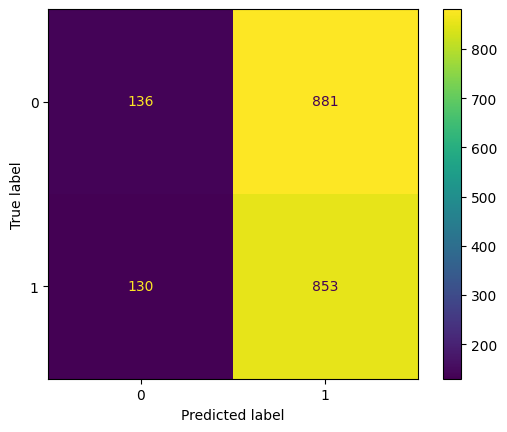

In [76]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

clf = RandomForestClassifier(max_depth=3,
    n_estimators=200,
    max_features=30,
    min_samples_leaf=1)
# Create the model on train dataset
model_rf = clf.fit(X_train, Y_train)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled_rf = scaler.transform(X_train)
X_test_scaled_rf = scaler.transform(X_test)
model_rf.fit(X_train_scaled_rf, Y_train)

predictions_rf = model_rf.predict(X_test_scaled_rf)

# 評估
print("Accuracy:", accuracy_score(Y_test, predictions_rf))
print("Confusion Matrix:\n", confusion_matrix(Y_test, predictions_rf))
print("Classification Report:\n", classification_report(Y_test, predictions_rf))
print("Recall Score:", recall_score(Y_test, predictions_rf))
print("Precision Score:", precision_score(Y_test, predictions_rf))

Accuracy: 0.494
Confusion Matrix:
 [[156 861]
 [151 832]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.15      0.24      1017
           1       0.49      0.85      0.62       983

    accuracy                           0.49      2000
   macro avg       0.50      0.50      0.43      2000
weighted avg       0.50      0.49      0.43      2000

Recall Score: 0.8463886063072228
Precision Score: 0.49143532191376255


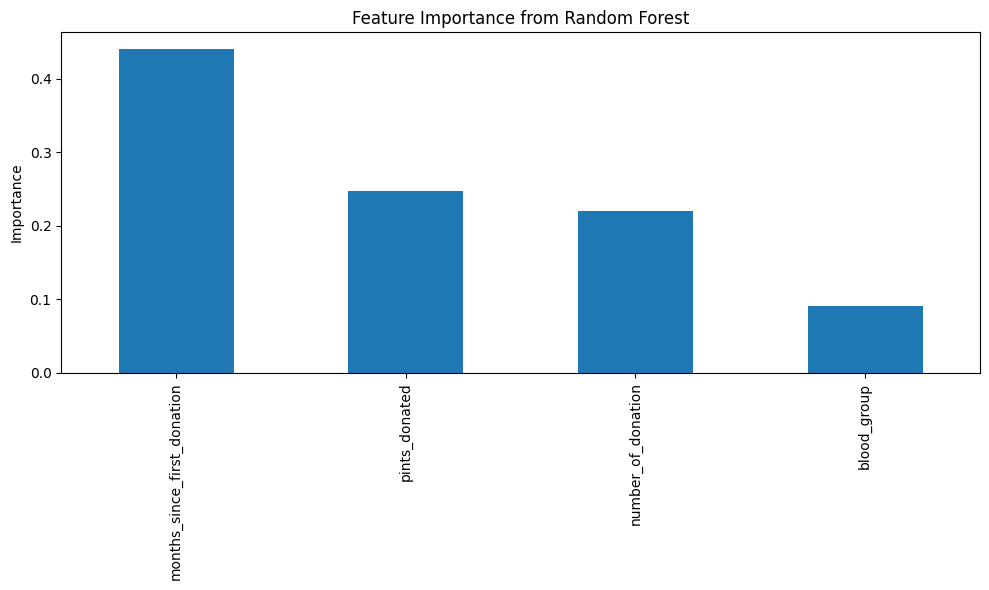

In [79]:
importances = clf.feature_importances_
features = X.columns

# 排序顯示
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

# 畫圖
plt.figure(figsize=(10, 6))
feat_imp.plot(kind='bar')
plt.title("Feature Importance from Random Forest")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [83]:
#predection
new_data = pd.DataFrame({
    'blood_group': [1],
    'months_since_first_donation': [10],
    'number_of_donation': [5],
    'pints_donated': [50]
})


new_data_scaled = scaler.transform(new_data)


predictions_new_data = model_rf.predict(new_data_scaled)
if predictions_new_data[0] == 0:
    print("Prediction: Not Available")
else:
    print("Prediction: Available")


Prediction: Not Available
